In [1]:
from datascience import *
import numpy as np
import glob
import pandas as pd
% matplotlib inline

Here we load our combined file into a  table.

If you don't have a combined file yet, you need to run "merge-files.ipynb" on the four provided csv files.

In [2]:
all_entries = Table.read_table('WRA/combined.csv')
# Data Cleaning: Dropping produced unnamed columns
all_entries = all_entries.drop(['Unnamed: 0'])
all_entries

# we get a DtypeWarning here.  It can be ignored, for our purposes.

/opt/conda/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2821: DtypeWarning: Columns (35) have mixed types. Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):


LAST NAME,FIRST NAME,MIDDLE INITIAL,RELOCATION PROJECT,ASSEMBLY CENTER,LAST PERMANENT ADDRESS,LAST PERMANENT ADDRESS STATE,LAST PERMANENT ADDRESS COUNTY,LAST PERMANENT ADDRESS POPULATION DENSITY,BIRTH PLACE OF PARENTS,FATHERS OCCUPATION IN U.S.,FATHERS OCCUPATION ABROAD,TOTAL YEARS OF SCHOOLING IN JAPAN,YEARS OF SCHOOLING IN JAPAN,EDUCATIONAL DEGREES,YEAR OF FIRST ARRIVAL IN TERRITORIAL U.S.,TOTAL LENGTH OF TIME IN JAPAN,NUMBER OF TIMES IN JAPAN,AGE AT TIME IN JAPAN,"MILITARY AND NAVAL SERVICE, PUBLIC ASSISTANCE AND PENSIONS, PHYSICAL DEFECTS",INDIVIDUAL NUMBER,SEX AND MARITAL STATUS,RACE OF INDIVIDUAL AND SPOUSE,YEAR OF BIRTH,BIRTH PLACE,"ALIEN REGISTRATION NUMBER, SOCIAL SECURITY NUMBER AND JAPANESE LANGUAGE SCHOOL",HIGHEST GRADE COMPLETED OR GRADE ATTENDING,LANGUAGE,RELIGION,PRIMARY OCCUPATION,SECONDARY OCCUPATION,TERTIARY OCCUPATION,POTENTIAL OCCUPATION 1,POTENTIAL OCCUPATION 2,FILE NUMBER,BLANK 1
NAKANISHI,SHIZUKO,nan,Tule Lake,Pinedale,"ENUMCLAW, KENT, AUBURN OR RENTON, WASHINGTON",Pacific States - Washington,KING,2500 - 4999,"Father=Japan, Mother=Japan",FARM OPERATORS & MANAGERS,"BLANK, UNKNOWN, NONE, DASH",NONE,NONE,NO DEGREE,--,NONE,NONE--ATTENDING SCHOOL,NEVER IN JAPAN,MASKED VALUE,17100D,FEMALE SINGLE,INDIVIDUAL-JAPANESE; NO SPOUSE,26,Pacific States - Washington,HAS NEITHER A.R. NOR S. S. NUMBER AND HAS ATTENDED JAPANESE LANGUAGE SCHOOL,HIGH SCHOOL 2 IN U.S.,"JAPANESE SPEAK, WRITE, READ; ENGLISH SPEAK, READ & WRITE",MASKED VALUE,nan,nan,nan,"Clerks, General",Library Assistants and Attendants,413298,21101
NAKANISHI,TADASHI,nan,Tule Lake,Pinedale,"ENUMCLAW, KENT, AUBURN OR RENTON, WASHINGTON",Pacific States - Washington,KING,2500 - 4999,"Father=Japan, Mother=Japan",FARM OPERATORS & MANAGERS,"BLANK, UNKNOWN, NONE, DASH",NONE,NONE,NO DEGREE,--,NONE,NONE--ATTENDING SCHOOL,NEVER IN JAPAN,MASKED VALUE,17100E,MALE SINGLE,INDIVIDUAL-JAPANESE; NO SPOUSE,27,Pacific States - Washington,HAS NEITHER A.R. NOR S. S. NUMBER AND HAS ATTENDED JAPANESE LANGUAGE SCHOOL,ELEMENTARY 8 IN U.S.,"JAPANESE SPEAKING; ENGLISH SPEAK, READ AND WRITE",MASKED VALUE,nan,nan,nan,nan,nan,413299,21081
NAKANISHI,TERUKO,nan,Tule Lake,Pinedale,"ENUMCLAW, KENT, AUBURN OR RENTON, WASHINGTON",Pacific States - Washington,KING,2500 - 4999,"Father=Japan, Mother=Japan",FARM OPERATORS & MANAGERS,"BLANK, UNKNOWN, NONE, DASH",NONE,NONE,NO DEGREE,--,NONE,NONE--ATTENDING SCHOOL,NEVER IN JAPAN,MASKED VALUE,17100F,FEMALE SINGLE,INDIVIDUAL-JAPANESE; NO SPOUSE,30,Pacific States - Washington,HAS NEITHER A.R. NOR S. S. NUMBER AND HAS ATTENDED JAPANESE LANGUAGE SCHOOL,ELEMENTARY 6 IN U.S.,"JAPANESE SPEAK, WRITE, READ; ENGLISH SPEAK, READ & WRITE",MASKED VALUE,nan,nan,nan,nan,nan,413300,11061
NAKANISHI,TAKESHI,R,Tule Lake,Pinedale,"ENUMCLAW, KENT, AUBURN OR RENTON, WASHINGTON",Pacific States - Washington,KING,2500 - 4999,"Father=Japan, Mother=Japan",FARM OPERATORS & MANAGERS,"BLANK, UNKNOWN, NONE, DASH",NONE,NONE,NO DEGREE,--,NONE,NONE-- NOT ATTENDING SCHOOL,NEVER IN JAPAN,MASKED VALUE,17100G,MALE SINGLE,INDIVIDUAL-JAPANESE; NO SPOUSE,41,Pacific States - Washington,HAS NEITHER A.R. NOR S. S. NUMBER AND HAS NOT ATTENDED JAPANESE LANGUAGE S ...,NO SCHOOLING OR KINDERGARTEN IN EITHER JAPAN OR U.S.,NOT APPLICABLE (11 YRS. AND UNDER),MASKED VALUE,nan,nan,nan,nan,nan,413301,13001
NAKANISHI,SHIZUE,nan,Tule Lake,Pinedale,"ENUMCLAW, KENT, AUBURN OR RENTON, WASHINGTON",Pacific States - Washington,KING,2500 - 4999,"Father=Japan, Mother=Japan","BLANK, UNKNOWN, NONE, DASH",FARM OPERATORS & MANAGERS,12 YEARS,1-8 & 9-12 YEARS OF SCHOOL ONLY,NO DEGREE,nan,15 YEARS BUT LESS THAN 20 IN JAPAN,1 TIME-- NOT ATTENDING SCHOOL,BETWEEN AGES 0-9 & ALSO 10-19,MASKED VALUE,17100H,FEMALE MARRIED,INDIVIDUAL-JAPANESE; SPOUSE-JAPANESE,19,Pacific States - California,HAS NEITHER A.R. NOR S. S. NUMBER AND HAS NOT ATTENDED JAPANESE LANGUAGE S ...,HIGH SCHOOL 4 IN JAPAN,"JAPANESE SPEAK, WRITE, READ ONLY",MASKED VALUE,"Farm Hands, Vegetable",nan,nan,Semiskilled Occupations in Manufacture of Knit Goods,Semiskilled

In [3]:
student_names = ['Kazuya Abe', 'Ray Itaya', 'Emiko Hayashi', 'Dorothy Sakuri', 'Yoshi Sugiyama', 'Motomu Takata', 'Haru Tanaka', 'Fujino Yashida']
unknown_first_name = ['Mrs. H Itaya', 'T Watanabe']
student_names

['Kazuya Abe',
 'Ray Itaya',
 'Emiko Hayashi',
 'Dorothy Sakuri',
 'Yoshi Sugiyama',
 'Motomu Takata',
 'Haru Tanaka',
 'Fujino Yashida']

With that list of names, we can search for them in the data.  But there are some things we need to do to process the names.  We must:
- use the upper() method on the names (why?)
- split the names into a last name and a first name

And we want to do that for each name in the list, so we create a function with a for loop.

In [3]:
# all_entries.where('LAST NAME', last_name).where('FIRST NAME', first_name)

def get_relocation_info(student_names):
    student_table = Table(labels = all_entries.labels)
    for student in student_names:
        first_name, last_name = student.upper().split(' ')
        # Why did we use the upper function?
        
        print('First Name: {}, Last Name: {}'.format(first_name, last_name)) 
        query = all_entries.where('LAST NAME', last_name).where('FIRST NAME', first_name)
        student_table.append(query)
    return student_table


First Name: KAZUYA, Last Name: ABE
First Name: RAY, Last Name: ITAYA
First Name: EMIKO, Last Name: HAYASHI
First Name: DOROTHY, Last Name: SAKURI
First Name: YOSHI, Last Name: SUGIYAMA
First Name: MOTOMU, Last Name: TAKATA
First Name: HARU, Last Name: TANAKA
First Name: FUJINO, Last Name: YASHIDA


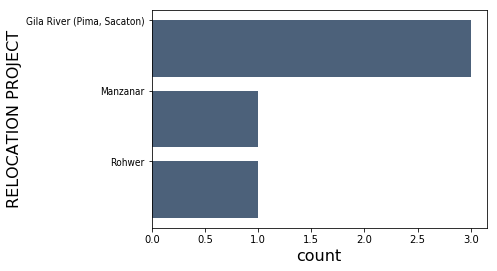

In [5]:
#output the results as a bar chart.

output_table = get_relocation_info(student_names)
project_counts = output_table.group('RELOCATION PROJECT')
project_counts.barh('RELOCATION PROJECT')


Great, we have a bar chart!

But is it good... ?

Let's take a closer look at the data.

In [6]:
output_table

LAST NAME,FIRST NAME,MIDDLE INITIAL,RELOCATION PROJECT,ASSEMBLY CENTER,LAST PERMANENT ADDRESS,LAST PERMANENT ADDRESS STATE,LAST PERMANENT ADDRESS COUNTY,LAST PERMANENT ADDRESS POPULATION DENSITY,BIRTH PLACE OF PARENTS,FATHERS OCCUPATION IN U.S.,FATHERS OCCUPATION ABROAD,TOTAL YEARS OF SCHOOLING IN JAPAN,YEARS OF SCHOOLING IN JAPAN,EDUCATIONAL DEGREES,YEAR OF FIRST ARRIVAL IN TERRITORIAL U.S.,TOTAL LENGTH OF TIME IN JAPAN,NUMBER OF TIMES IN JAPAN,AGE AT TIME IN JAPAN,"MILITARY AND NAVAL SERVICE, PUBLIC ASSISTANCE AND PENSIONS, PHYSICAL DEFECTS",INDIVIDUAL NUMBER,SEX AND MARITAL STATUS,RACE OF INDIVIDUAL AND SPOUSE,YEAR OF BIRTH,BIRTH PLACE,"ALIEN REGISTRATION NUMBER, SOCIAL SECURITY NUMBER AND JAPANESE LANGUAGE SCHOOL",HIGHEST GRADE COMPLETED OR GRADE ATTENDING,LANGUAGE,RELIGION,PRIMARY OCCUPATION,SECONDARY OCCUPATION,TERTIARY OCCUPATION,POTENTIAL OCCUPATION 1,POTENTIAL OCCUPATION 2,FILE NUMBER,BLANK 1
ITAYA,RAY,R,Rohwer,Stockton,"STOCKTON, CALIFORNIA",Pacific States - California,SAN JOAQUIN,"25,000 - 999,999","Father=U.S. exc., Mother=U.S. exc.",FARM OPERATORS & MANAGERS,"BLANK, UNKNOWN, NONE, DASH",NONE,NONE,NO DEGREE,--,NONE,NONE--ATTENDING SCHOOL,NEVER IN JAPAN,MASKED VALUE,26101C,MALE SINGLE,INDIVIDUAL-JAPANESE; NO SPOUSE,31,Pacific States - California,HAS NEITHER A.R. NOR S. S. NUMBER AND HAS NOT ATTENDED JAPANESE LANGUAGE S ...,ELEMENTARY 7 IN U.S.,NOT APPLICABLE (11 YRS. AND UNDER),MASKED VALUE,nan,nan,nan,nan,nan,907020,11071
HAYASHI,EMIKO,nan,Manzanar,Manzanar (up to 6/1/42),"MANTECA, CALIFORNIA",Pacific States - California,SAN JOAQUIN,Incorporated cities of less than 2500 population All uni ...,"Father=Japan, Mother=Japan",FARM LABORERS INCLUDING FOREMEN,"BLANK, UNKNOWN, NONE, DASH",NONE,NONE,NO DEGREE,nan,UNDER 6 MONTHS IN JAPAN,1 TIME--ATTENDING SCHOOL,BETWEEN AGES 0-9 ONLY,MASKED VALUE,31618D,FEMALE SINGLE,INDIVIDUAL-JAPANESE; NO SPOUSE,29,Pacific States - California,HAS NEITHER A.R. NOR S. S. NUMBER AND HAS NOT ATTENDED JAPANESE LANGUAGE S ...,ELEMENTARY 8 IN U.S.,"JAPANESE SPEAKING; ENGLISH SPEAK, READ AND WRITE",MASKED VALUE,nan,nan,nan,nan,nan,106615,11082
HAYASHI,EMIKO,nan,"Gila River (Pima, Sacaton)",Tulare,"BELL, COMPTON, SAN GABRIEL, REDONDO BEACH, LYNWOOD, MAYW ...",Pacific States - California,LOS ANGELES,"10,000 - 24,999","Father=Japan, Mother=Japan",FARM LABORERS INCLUDING FOREMEN,FARM OPERATORS & MANAGERS,9 YEARS,1-8 & 9-12 YEARS OF SCHOOL ONLY,NO DEGREE,nan,10 YEARS BUT LESS THAN 15 YEARS IN JAPAN,1 TIME-- NOT ATTENDING SCHOOL,BETWEEN AGES 0-9 & ALSO 10-19,MASKED VALUE,23457B,FEMALE MARRIED,INDIVIDUAL-JAPANESE; SPOUSE-JAPANESE,14,Pacific States - California,HAS NEITHER A.R. NOR S. S. NUMBER AND HAS NOT ATTENDED JAPANESE LANGUAGE S ...,HIGH SCHOOL 3 IN JAPAN,"JAPANESE SPEAK, WRITE, READ; ENGLISH SPEAK, READ & WRITE",MASKED VALUE,Undefined Code,nan,nan,Skilled Dressmakers and Seamstresses,nan,300984,42113
TAKATA,MOTOMU,nan,"Gila River (Pima, Sacaton)",Turlook,"STOCKTON, CALIFORNIA",Pacific States - California,SAN JOAQUIN,"25,000 - 999,999","Father=Japan, Mother=Japan",FARM OPERATORS & MANAGERS,"BLANK, UNKNOWN, NONE, DASH",NONE,NONE,NO DEGREE,--,NONE,NONE--ATTENDING SCHOOL,NEVER IN JAPAN,MASKED VALUE,07391G,MALE SINGLE,INDIVIDUAL-JAPANESE; NO SPOUSE,29,Pacific States - California,HAS NEITHER A.R. NOR S. S. NUMBER AND HAS NOT ATTENDED JAPANESE LANGUAGE S ...,ELEMENTARY 8 IN U.S.,"ENGLISH SPEAK, WRITE, READ ONLY",MASKED VALUE,nan,nan,nan,nan,nan,310102,11081
TANAKA,HARU,nan,"Gila River (Pima, Sacaton)",Turlook,"STOCKTON, CALIFORNIA",Pacific States - California,SAN JOAQUIN,"25,000 - 999,999","Father=Japan, Mother=Japan",FARM OPERATORS & MANAGERS,"BLANK, UNKNOWN, NONE, DASH",NONE,NONE,NO DEGREE,--,NONE,NONE--ATTENDING SCHOOL,NEVER IN JAPAN,MASKED VALUE,07320I,FEMALE SINGLE,INDIVIDUAL-JAPANESE; NO SPOUSE,30,Pacific States - California,HAS NEITHER A.R. NOR S. S. NUMBER AND HAS NOT ATTENDED JAPANESE LANGUAGE S ...,ELEMENTARY 7 IN U.S.,"JAPANESE SPEAK, WRITE, READ; ENGLISH SPEAK, READ & WRITE",MASKED VALUE,nan,n

- What is going on with our table here?
- How might we fix the problems?
- Even with the problems, can we answer our question?

Can we find T Watanabe?  Let's try our function.


In [7]:
get_relocation_info(['T Watanabe'])

First Name: T, Last Name: WATANABE


LAST NAME,FIRST NAME,MIDDLE INITIAL,RELOCATION PROJECT,ASSEMBLY CENTER,LAST PERMANENT ADDRESS,LAST PERMANENT ADDRESS STATE,LAST PERMANENT ADDRESS COUNTY,LAST PERMANENT ADDRESS POPULATION DENSITY,BIRTH PLACE OF PARENTS,FATHERS OCCUPATION IN U.S.,FATHERS OCCUPATION ABROAD,TOTAL YEARS OF SCHOOLING IN JAPAN,YEARS OF SCHOOLING IN JAPAN,EDUCATIONAL DEGREES,YEAR OF FIRST ARRIVAL IN TERRITORIAL U.S.,TOTAL LENGTH OF TIME IN JAPAN,NUMBER OF TIMES IN JAPAN,AGE AT TIME IN JAPAN,"MILITARY AND NAVAL SERVICE, PUBLIC ASSISTANCE AND PENSIONS, PHYSICAL DEFECTS",INDIVIDUAL NUMBER,SEX AND MARITAL STATUS,RACE OF INDIVIDUAL AND SPOUSE,YEAR OF BIRTH,BIRTH PLACE,"ALIEN REGISTRATION NUMBER, SOCIAL SECURITY NUMBER AND JAPANESE LANGUAGE SCHOOL",HIGHEST GRADE COMPLETED OR GRADE ATTENDING,LANGUAGE,RELIGION,PRIMARY OCCUPATION,SECONDARY OCCUPATION,TERTIARY OCCUPATION,POTENTIAL OCCUPATION 1,POTENTIAL OCCUPATION 2,FILE NUMBER,BLANK 1


It doesn't work.  We'll need something to account for the lack of a full first name.

In [8]:
def get_relocation_info_2(student_names):
    student_table = Table(labels = all_entries.labels)
    for student in student_names:
        first_name, last_name = student.upper().split(' ')
        print('First Name: {}, Last Name: {}'.format(first_name, last_name)) 
        query = all_entries.where('LAST NAME', last_name).where('FIRST NAME', first_name)
        
        if last_name in query[0]:
            output = student_table.append(query)
        else:
            print('Full name not found, checking for last name only...')
            query = query = all_entries.where('LAST NAME', last_name)
            if last_name in query[0]:
                output = student_table.append(query)
            else:
                output = print('Last name not found')
    return output

In [9]:
get_relocation_info_2(['T Watanabe'])

First Name: T, Last Name: WATANABE
Full name not found, checking for last name only...


LAST NAME,FIRST NAME,MIDDLE INITIAL,RELOCATION PROJECT,ASSEMBLY CENTER,LAST PERMANENT ADDRESS,LAST PERMANENT ADDRESS STATE,LAST PERMANENT ADDRESS COUNTY,LAST PERMANENT ADDRESS POPULATION DENSITY,BIRTH PLACE OF PARENTS,FATHERS OCCUPATION IN U.S.,FATHERS OCCUPATION ABROAD,TOTAL YEARS OF SCHOOLING IN JAPAN,YEARS OF SCHOOLING IN JAPAN,EDUCATIONAL DEGREES,YEAR OF FIRST ARRIVAL IN TERRITORIAL U.S.,TOTAL LENGTH OF TIME IN JAPAN,NUMBER OF TIMES IN JAPAN,AGE AT TIME IN JAPAN,"MILITARY AND NAVAL SERVICE, PUBLIC ASSISTANCE AND PENSIONS, PHYSICAL DEFECTS",INDIVIDUAL NUMBER,SEX AND MARITAL STATUS,RACE OF INDIVIDUAL AND SPOUSE,YEAR OF BIRTH,BIRTH PLACE,"ALIEN REGISTRATION NUMBER, SOCIAL SECURITY NUMBER AND JAPANESE LANGUAGE SCHOOL",HIGHEST GRADE COMPLETED OR GRADE ATTENDING,LANGUAGE,RELIGION,PRIMARY OCCUPATION,SECONDARY OCCUPATION,TERTIARY OCCUPATION,POTENTIAL OCCUPATION 1,POTENTIAL OCCUPATION 2,FILE NUMBER,BLANK 1
WATANABE,SETSUKO,nan,Manzanar,Manzanar (up to 6/1/42),"LOS ANGELES, CALIFORNIA",Pacific States - California,LOS ANGELES,"1,000,000 - or more","Father=Japan, Mother=Japan",CLERICAL & SALES,"BLANK, UNKNOWN, NONE, DASH",NONE,NONE,NO DEGREE,--,NONE,NONE-- NOT ATTENDING SCHOOL,NEVER IN JAPAN,MASKED VALUE,01014D,FEMALE MARRIED,INDIVIDUAL-JAPANESE; SPOUSE-JAPANESE,21,Pacific States - California,HAS S.S. BUT NOT A.R. NUMBER AND HAS NOT ATTENDED JAPANESE LANGUAGE SCHOOL,HIGH SCHOOL 4 IN U.S.,"JAPANESE SPEAKING; ENGLISH SPEAK, READ AND WRITE",MASKED VALUE,Sales Clerks,nan,nan,Semiskilled Occupations in Manufacture of Knit Goods,nan,100050,31121
WATANABE,WALTER,T,Manzanar,Manzanar (up to 6/1/42),"BELL, COMPTON, SAN GABRIEL, REDONDO BEACH, LYNWOOD, MAYW ...",Pacific States - California,LOS ANGELES,"10,000 - 24,999","Father=Japan, Mother=Japan",CLERICAL & SALES,PROFESSIONAL & SEMI-PROFESSIONAL,11 YEARS,1-8 & 9-12 YEARS OF SCHOOL ONLY,NO DEGREE,06,15 YEARS BUT LESS THAN 20 IN JAPAN,2 TIMES-- NOT ATTENDING SCHOOL,"BETWEEN AGES 0-9, 10-19 & ALSO 20 & OVER",MASKED VALUE,01092A,MALE MARRIED,INDIVIDUAL-JAPANESE; SPOUSE-JAPANESE,88,"Japan - Urban Prefectures (Kyoto, Osaka and Tokyo)",HAS A.R. BUT NOT S.S. NUMBER AND HAS NOT ATTENDED JAPANESE LANGUAGE SCHOOL,HIGH SCHOOL 3 IN JAPAN,"JAPANESE SPEAK, WRITE, READ; ENGLISH SPEAK, READ & WRITE",MASKED VALUE,Nursery Operators and Flower Growers,"Salesmen, Brokerage and Commission Firms, N.E.C.",nan,nan,nan,100247,72114
WATANABE,YOSHINO,nan,Manzanar,Manzanar (up to 6/1/42),"BELL, COMPTON, SAN GABRIEL, REDONDO BEACH, LYNWOOD, MAYW ...",Pacific States - California,LOS ANGELES,"10,000 - 24,999","Father=Japan, Mother=Japan","BLANK, UNKNOWN, NONE, DASH",MANAGERIAL & OFFICIAL (EXCEPT FARM),11 YEARS,1-8 & 9-12 YEARS OF SCHOOL ONLY,NO DEGREE,20,20 YEARS OR MORE,2 TIMES-- NOT ATTENDING SCHOOL,"BETWEEN AGES 0-9, 10-19 & ALSO 20 & OVER",MASKED VALUE,01092B,FEMALE MARRIED,INDIVIDUAL-JAPANESE; SPOUSE-JAPANESE,97,Japan - Central Division,HAS A.R. BUT NOT S.S. NUMBER AND HAS NOT ATTENDED JAPANESE LANGUAGE SCHOOL,HIGH SCHOOL 3 IN JAPAN,"JAPANESE SPEAK, WRITE, READ ONLY",MASKED VALUE,Undefined Code,nan,nan,Semiskilled Dressmakers and Seamstresses,nan,100248,72114
WATANABE,MARY,T,Manzanar,Manzanar (up to 6/1/42),"BELL, COMPTON, SAN GABRIEL, REDONDO BEACH, LYNWOOD, MAYW ...",Pacific States - California,LOS ANGELES,"10,000 - 24,999","Father=Japan, Mother=Japan",FARM LABORERS INCLUDING FOREMEN,"BLANK, UNKNOWN, NONE, DASH",NONE,NONE,NO DEGREE,--,NONE,NONE--ATTENDING SCHOOL,NEVER IN JAPAN,MASKED VALUE,01092C,FEMALE SINGLE,INDIVIDUAL-JAPANESE; NO SPOUSE,22,Pacific States - California,HAS NEITHER A.R. NOR S. S. NUMBER AND HAS NOT ATTENDED JAPANESE LANGUAGE S ...,COLLEGE 2 IN U.S.,"JAPANESE SPEAKING; ENGLISH SPEAK, READ AND WRITE",MASKED VALUE,nan,nan,nan,nan,nan,100249,31151
WATANABE,CHIZU,A,Manzanar,Manzanar (up to 6/1/42),"BELL, COMPTON, SAN GABRIEL, REDONDO BEACH, LYNWOOD, MAYW ...",Pacific States - California,LOS ANGELES,"10,000 - 24,999","Father=Japan, Mother=Japan",FARM LABORERS INCLUDING FOREMEN,"BLANK, UNKNOWN, NONE, DASH",N

We could simply scroll through the table and find it, but we can narrow down our search another way, starting with that output...

In [10]:
get_relocation_info_2(['T Watanabe']).where('LAST PERMANENT ADDRESS COUNTY', 'SAN JOAQUIN').show(max_rows = 100)

First Name: T, Last Name: WATANABE
Full name not found, checking for last name only...


LAST NAME,FIRST NAME,MIDDLE INITIAL,RELOCATION PROJECT,ASSEMBLY CENTER,LAST PERMANENT ADDRESS,LAST PERMANENT ADDRESS STATE,LAST PERMANENT ADDRESS COUNTY,LAST PERMANENT ADDRESS POPULATION DENSITY,BIRTH PLACE OF PARENTS,FATHERS OCCUPATION IN U.S.,FATHERS OCCUPATION ABROAD,TOTAL YEARS OF SCHOOLING IN JAPAN,YEARS OF SCHOOLING IN JAPAN,EDUCATIONAL DEGREES,YEAR OF FIRST ARRIVAL IN TERRITORIAL U.S.,TOTAL LENGTH OF TIME IN JAPAN,NUMBER OF TIMES IN JAPAN,AGE AT TIME IN JAPAN,"MILITARY AND NAVAL SERVICE, PUBLIC ASSISTANCE AND PENSIONS, PHYSICAL DEFECTS",INDIVIDUAL NUMBER,SEX AND MARITAL STATUS,RACE OF INDIVIDUAL AND SPOUSE,YEAR OF BIRTH,BIRTH PLACE,"ALIEN REGISTRATION NUMBER, SOCIAL SECURITY NUMBER AND JAPANESE LANGUAGE SCHOOL",HIGHEST GRADE COMPLETED OR GRADE ATTENDING,LANGUAGE,RELIGION,PRIMARY OCCUPATION,SECONDARY OCCUPATION,TERTIARY OCCUPATION,POTENTIAL OCCUPATION 1,POTENTIAL OCCUPATION 2,FILE NUMBER,BLANK 1
WATANABE,KANICHI,B,Manzanar,Manzanar (up to 6/1/42),"MANTECA, CALIFORNIA",Pacific States - California,SAN JOAQUIN,Incorporated cities of less than 2500 population All uni ...,"Father=Japan, Mother=Japan","BLANK, UNKNOWN, NONE, DASH","BLANK, UNKNOWN, NONE, DASH",NONE,NONE,NO DEGREE,--,NONE,NONE-- NOT ATTENDING SCHOOL,NEVER IN JAPAN,MASKED VALUE,31611E,MALE SINGLE,INDIVIDUAL-JAPANESE; NO SPOUSE,18,Pacific States - California,HAS NEITHER A.R. NOR S. S. NUMBER AND HAS NOT ATTENDED JAPANESE LANGUAGE S ...,HIGH SCHOOL 4 IN U.S.,"JAPANESE SPEAKING; ENGLISH SPEAK, READ AND WRITE",MASKED VALUE,"Skilled Mechanics and Repairmen, Motor Vehicle",nan,nan,nan,nan,106583,31121
WATANABE,KIYOSHI,nan,Manzanar,Manzanar (up to 6/1/42),"MANTECA, CALIFORNIA",Pacific States - California,SAN JOAQUIN,Incorporated cities of less than 2500 population All uni ...,"Father=Japan, Mother=Japan","BLANK, UNKNOWN, NONE, DASH","BLANK, UNKNOWN, NONE, DASH",8 YEARS,1-8 YEARS OF SCHOOL ONLY,NO DEGREE,12,10 YEARS BUT LESS THAN 15 YEARS IN JAPAN,2 TIMES-- NOT ATTENDING SCHOOL,"BETWEEN AGES 0-9, 10-19 & ALSO 20 & OVER",MASKED VALUE,31636B,MALE MARRIED,INDIVIDUAL-JAPANESE; SPOUSE-JAPANESE,98,Japan - Central Division,HAS A.R. BUT NOT S.S. NUMBER AND HAS NOT ATTENDED JAPANESE LANGUAGE SCHOOL,ELEMENTARY 8 IN JAPAN,"JAPANESE SPEAK, WRITE, READ; ENGLISH SPEAKING",MASKED VALUE,Farm Managers and Foremen,nan,nan,nan,nan,106678,62084
WATANABE,CHII,nan,Manzanar,Manzanar (up to 6/1/42),"MANTECA, CALIFORNIA",Pacific States - California,SAN JOAQUIN,Incorporated cities of less than 2500 population All uni ...,"Father=Japan, Mother=Japan","BLANK, UNKNOWN, NONE, DASH","BLANK, UNKNOWN, NONE, DASH",8 YEARS,1-8 YEARS OF SCHOOL ONLY,NO DEGREE,24,15 YEARS BUT LESS THAN 20 IN JAPAN,2 TIMES-- NOT ATTENDING SCHOOL,"BETWEEN AGES 0-9, 10-19 & ALSO 20 & OVER",MASKED VALUE,31636C,FEMALE MARRIED,INDIVIDUAL-JAPANESE; SPOUSE-JAPANESE,5,Japan - Central Division,HAS A.R. BUT NOT S.S. NUMBER AND HAS NOT ATTENDED JAPANESE LANGUAGE SCHOOL,ELEMENTARY 8 IN JAPAN,"JAPANESE SPEAK, WRITE, READ ONLY",MASKED VALUE,Undefined Code,nan,nan,Skillled Occupations in Manufacture of Knit Goods,nan,106679,62084
WATANABE,FUMIKO,nan,Manzanar,Manzanar (up to 6/1/42),"MANTECA, CALIFORNIA",Pacific States - California,SAN JOAQUIN,Incorporated cities of less than 2500 population All uni ...,"Father=Japan, Mother=Japan",FARM OPERATORS & MANAGERS,"BLANK, UNKNOWN, NONE, DASH",NONE,NONE,NO DEGREE,--,NONE,NONE--ATTENDING SCHOOL,NEVER IN JAPAN,MASKED VALUE,31636D,FEMALE SINGLE,INDIVIDUAL-JAPANESE; NO SPOUSE,25,Pacific States - California,HAS NEITHER A.R. NOR S. S. NUMBER AND HAS NOT ATTENDED JAPANESE LANGUAGE S ...,HIGH SCHOOL 3 IN U.S.,"JAPANESE SPEAK, WRITE, READ; ENGLISH SPEAK, READ & WRITE",MASKED VALUE,nan,nan,nan,nan,nan,106680,21111
WATANABE,CHIYOKO,nan,Manzanar,Manzanar (up to 6/1/42),"MANTECA, CALIFORNIA",Pacific States - California,SAN JOAQUIN,Incorporated cities of less than 2500 population All uni ...,"Father=Japan, Mother=Japan",FARM OPERATORS & MANAGERS,"BLANK, UNKNOWN, NONE, DASH",NONE,NONE,NO DEGREE,nan,UNDER 6 MONTHS I

That is still too many.  How might we narrow the search down further?

In [11]:
get_relocation_info_2(['T Watanabe']).where('HIGHEST GRADE COMPLETED OR GRADE ATTENDING', 'ELEMENTARY 7 IN U.S.').where('LAST PERMANENT ADDRESS COUNTY', 'SAN JOAQUIN')

First Name: T, Last Name: WATANABE
Full name not found, checking for last name only...


LAST NAME,FIRST NAME,MIDDLE INITIAL,RELOCATION PROJECT,ASSEMBLY CENTER,LAST PERMANENT ADDRESS,LAST PERMANENT ADDRESS STATE,LAST PERMANENT ADDRESS COUNTY,LAST PERMANENT ADDRESS POPULATION DENSITY,BIRTH PLACE OF PARENTS,FATHERS OCCUPATION IN U.S.,FATHERS OCCUPATION ABROAD,TOTAL YEARS OF SCHOOLING IN JAPAN,YEARS OF SCHOOLING IN JAPAN,EDUCATIONAL DEGREES,YEAR OF FIRST ARRIVAL IN TERRITORIAL U.S.,TOTAL LENGTH OF TIME IN JAPAN,NUMBER OF TIMES IN JAPAN,AGE AT TIME IN JAPAN,"MILITARY AND NAVAL SERVICE, PUBLIC ASSISTANCE AND PENSIONS, PHYSICAL DEFECTS",INDIVIDUAL NUMBER,SEX AND MARITAL STATUS,RACE OF INDIVIDUAL AND SPOUSE,YEAR OF BIRTH,BIRTH PLACE,"ALIEN REGISTRATION NUMBER, SOCIAL SECURITY NUMBER AND JAPANESE LANGUAGE SCHOOL",HIGHEST GRADE COMPLETED OR GRADE ATTENDING,LANGUAGE,RELIGION,PRIMARY OCCUPATION,SECONDARY OCCUPATION,TERTIARY OCCUPATION,POTENTIAL OCCUPATION 1,POTENTIAL OCCUPATION 2,FILE NUMBER,BLANK 1
WATANABE,YOSHIKO,nan,Rohwer,Stockton,"STOCKTON, CALIFORNIA",Pacific States - California,SAN JOAQUIN,"25,000 - 999,999","Father=Japan, Mother=Japan",FARM OPERATORS & MANAGERS,"BLANK, UNKNOWN, NONE, DASH",NONE,NONE,NO DEGREE,nan,5 YEARS BUT LESS THAN 10 YEARS IN JAPAN,1 TIME-- NOT ATTENDING SCHOOL,BETWEEN AGES 10-19 ONLY,MASKED VALUE,06996D,FEMALE SINGLE,INDIVIDUAL-JAPANESE; NO SPOUSE,22,Pacific States - California,HAS NEITHER A.R. NOR S. S. NUMBER AND HAS NOT ATTENDED JAPANESE LANGUAGE S ...,ELEMENTARY 7 IN U.S.,"JAPANESE SPEAK, WRITE, READ; ENGLISH SPEAK, READ & WRITE",MASKED VALUE,nan,nan,nan,Semiskilled Dressmakers and Seamstresses,Semiskilled Occupations in Manufacture of Knit Goods,908450,31072
WATANABE,JIRO,J,Rohwer,Stockton,"STOCKTON, CALIFORNIA",Pacific States - California,SAN JOAQUIN,"25,000 - 999,999","Father=Japan, Mother=Japan",FARM OPERATORS & MANAGERS,"BLANK, UNKNOWN, NONE, DASH",NONE,NONE,NO DEGREE,nan,1 YEAR BUT LESS THAN 5 YEARS IN JAPAN,1 TIME--ATTENDING SCHOOL,BETWEEN AGES 0-9 ONLY,MASKED VALUE,06996E,MALE SINGLE,INDIVIDUAL-JAPANESE; NO SPOUSE,29,Pacific States - California,HAS NEITHER A.R. NOR S. S. NUMBER AND HAS NOT ATTENDED JAPANESE LANGUAGE S ...,ELEMENTARY 7 IN U.S.,"JAPANESE SPEAKING; ENGLISH SPEAK, READ AND WRITE",MASKED VALUE,nan,nan,nan,nan,nan,908451,11072


That wasn't it.... let's try again...

In [12]:
get_relocation_info_2(['T Watanabe']).where('HIGHEST GRADE COMPLETED OR GRADE ATTENDING', 'ELEMENTARY 8 IN U.S.').where('LAST PERMANENT ADDRESS COUNTY', 'SAN JOAQUIN')

First Name: T, Last Name: WATANABE
Full name not found, checking for last name only...


LAST NAME,FIRST NAME,MIDDLE INITIAL,RELOCATION PROJECT,ASSEMBLY CENTER,LAST PERMANENT ADDRESS,LAST PERMANENT ADDRESS STATE,LAST PERMANENT ADDRESS COUNTY,LAST PERMANENT ADDRESS POPULATION DENSITY,BIRTH PLACE OF PARENTS,FATHERS OCCUPATION IN U.S.,FATHERS OCCUPATION ABROAD,TOTAL YEARS OF SCHOOLING IN JAPAN,YEARS OF SCHOOLING IN JAPAN,EDUCATIONAL DEGREES,YEAR OF FIRST ARRIVAL IN TERRITORIAL U.S.,TOTAL LENGTH OF TIME IN JAPAN,NUMBER OF TIMES IN JAPAN,AGE AT TIME IN JAPAN,"MILITARY AND NAVAL SERVICE, PUBLIC ASSISTANCE AND PENSIONS, PHYSICAL DEFECTS",INDIVIDUAL NUMBER,SEX AND MARITAL STATUS,RACE OF INDIVIDUAL AND SPOUSE,YEAR OF BIRTH,BIRTH PLACE,"ALIEN REGISTRATION NUMBER, SOCIAL SECURITY NUMBER AND JAPANESE LANGUAGE SCHOOL",HIGHEST GRADE COMPLETED OR GRADE ATTENDING,LANGUAGE,RELIGION,PRIMARY OCCUPATION,SECONDARY OCCUPATION,TERTIARY OCCUPATION,POTENTIAL OCCUPATION 1,POTENTIAL OCCUPATION 2,FILE NUMBER,BLANK 1
WATANABE,TOSHIKO,nan,Manzanar,Manzanar (up to 6/1/42),"MANTECA, CALIFORNIA",Pacific States - California,SAN JOAQUIN,Incorporated cities of less than 2500 population All uni ...,"Father=Japan, Mother=Japan",FARM OPERATORS & MANAGERS,"BLANK, UNKNOWN, NONE, DASH",NONE,NONE,NO DEGREE,--,NONE,NONE--ATTENDING SCHOOL,NEVER IN JAPAN,MASKED VALUE,31636F,FEMALE SINGLE,INDIVIDUAL-JAPANESE; NO SPOUSE,29,Pacific States - California,HAS NEITHER A.R. NOR S. S. NUMBER AND HAS NOT ATTENDED JAPANESE LANGUAGE S ...,ELEMENTARY 8 IN U.S.,"JAPANESE SPEAK, WRITE, READ; ENGLISH SPEAK, READ & WRITE",MASKED VALUE,nan,nan,nan,nan,nan,106682,11081
WATANABE,CHIKAKO,nan,Rohwer,Stockton,"STOCKTON, CALIFORNIA",Pacific States - California,SAN JOAQUIN,"25,000 - 999,999","Father=Japan, Mother=Japan",MANAGERIAL & OFFICIAL (EXCEPT FARM),"BLANK, UNKNOWN, NONE, DASH",NONE,NONE,NO DEGREE,--,NONE,NONE--ATTENDING SCHOOL,NEVER IN JAPAN,MASKED VALUE,26103D,FEMALE SINGLE,INDIVIDUAL-JAPANESE; NO SPOUSE,29,Pacific States - California,HAS NEITHER A.R. NOR S. S. NUMBER AND HAS NOT ATTENDED JAPANESE LANGUAGE S ...,ELEMENTARY 8 IN U.S.,"JAPANESE SPEAKING; ENGLISH SPEAK, READ AND WRITE",MASKED VALUE,nan,nan,nan,nan,nan,904673,11081
WATANABE,SHOZO,nan,Rohwer,Stockton,"STOCKTON, CALIFORNIA",Pacific States - California,SAN JOAQUIN,"25,000 - 999,999","Father=Japan, Mother=Japan",FARM OPERATORS & MANAGERS,"BLANK, UNKNOWN, NONE, DASH",NONE,NONE,NO DEGREE,--,NONE,NONE--ATTENDING SCHOOL,NEVER IN JAPAN,MASKED VALUE,30169G,MALE SINGLE,INDIVIDUAL-JAPANESE; NO SPOUSE,29,Pacific States - California,HAS NEITHER A.R. NOR S. S. NUMBER AND HAS NOT ATTENDED JAPANESE LANGUAGE S ...,ELEMENTARY 8 IN U.S.,"ENGLISH SPEAK, WRITE, READ ONLY",MASKED VALUE,nan,nan,nan,nan,nan,904719,11081


Did we find her?  

How might we double check?

There is probably a programmatic way to get to this solution.  But, at this point, as historians we have to ask, is it worth the trouble?  What do you think?

LAST NAME,FIRST NAME,MIDDLE INITIAL,RELOCATION PROJECT,ASSEMBLY CENTER,LAST PERMANENT ADDRESS,LAST PERMANENT ADDRESS STATE,LAST PERMANENT ADDRESS COUNTY,LAST PERMANENT ADDRESS POPULATION DENSITY,BIRTH PLACE OF PARENTS,FATHERS OCCUPATION IN U.S.,FATHERS OCCUPATION ABROAD,TOTAL YEARS OF SCHOOLING IN JAPAN,YEARS OF SCHOOLING IN JAPAN,EDUCATIONAL DEGREES,YEAR OF FIRST ARRIVAL IN TERRITORIAL U.S.,TOTAL LENGTH OF TIME IN JAPAN,NUMBER OF TIMES IN JAPAN,AGE AT TIME IN JAPAN,"MILITARY AND NAVAL SERVICE, PUBLIC ASSISTANCE AND PENSIONS, PHYSICAL DEFECTS",INDIVIDUAL NUMBER,SEX AND MARITAL STATUS,RACE OF INDIVIDUAL AND SPOUSE,YEAR OF BIRTH,BIRTH PLACE,"ALIEN REGISTRATION NUMBER, SOCIAL SECURITY NUMBER AND JAPANESE LANGUAGE SCHOOL",HIGHEST GRADE COMPLETED OR GRADE ATTENDING,LANGUAGE,RELIGION,PRIMARY OCCUPATION,SECONDARY OCCUPATION,TERTIARY OCCUPATION,POTENTIAL OCCUPATION 1,POTENTIAL OCCUPATION 2,FILE NUMBER,BLANK 1
WATANABE,BESSIE,nan,Tule Lake,Pinedale,"Undocumented City, OREGON",Pacific States - Oregon,HOOD RIVER,2500 - 4999,"Father=Japan, Mother=Japan",FARM OPERATORS & MANAGERS,"BLANK, UNKNOWN, NONE, DASH",NONE,NONE,NO DEGREE,nan,6 MONTHS BUT LESS THAN 1 YEAR IN JAPAN,1 TIME-- NOT ATTENDING SCHOOL,BETWEEN AGES 0-9 & ALSO 10-19,MASKED VALUE,16386A,FEMALE SINGLE,INDIVIDUAL-JAPANESE; NO SPOUSE,23,Pacific States - Oregon,HAS NEITHER A.R. NOR S. S. NUMBER AND HAS NOT ATTENDED JAPANESE LANGUAGE S ...,HIGH SCHOOL 4 IN U.S.,"JAPANESE SPEAK, WRITE, READ; ENGLISH SPEAK, READ & WRITE",MASKED VALUE,Clerical and Kindred Occupations,nan,nan,Stenographer and Typists,Semiskilled Occupations in Manufacture of Knit Goods,413272,21122
WATANABE,RYOSUKE,nan,Tule Lake,Pinedale,"Undocumented City, OREGON",Pacific States - Oregon,HOOD RIVER,2500 - 4999,"Father=Japan, Mother=Japan","BLANK, UNKNOWN, NONE, DASH",FARM OPERATORS & MANAGERS,13 YEARS,"1-8, 9-12 & 13 OR MORE YEARS OF SCHOOL ONLY",NO DEGREE,07,20 YEARS OR MORE,2 TIMES-- NOT ATTENDING SCHOOL,"BETWEEN AGES 0-9, 10-19 & ALSO 20 & OVER",MASKED VALUE,16386B,MALE MARRIED,INDIVIDUAL-JAPANESE; SPOUSE-JAPANESE,86,Japan - Central Division,HAS A.R. BUT NOT S.S. NUMBER AND HAS NOT ATTENDED JAPANESE LANGUAGE SCHOOL,HIGH SCHOOL 5 IN JAPAN,"JAPANESE SPEAK, WRITE, READ; ENGLISH SPEAK, READ & WRITE",MASKED VALUE,Fruit Farmers,"Skilled Foremen, Construction",nan,nan,nan,413273,82134
WATANABE,SEN,nan,Tule Lake,Pinedale,"Undocumented City, OREGON",Pacific States - Oregon,HOOD RIVER,2500 - 4999,"Father=Japan, Mother=Japan","BLANK, UNKNOWN, NONE, DASH",MANAGERIAL & OFFICIAL (EXCEPT FARM),8 YEARS,1-8 YEARS OF SCHOOL ONLY,NO DEGREE,22,20 YEARS OR MORE,2 TIMES-- NOT ATTENDING SCHOOL,"BETWEEN AGES 0-9, 10-19 & ALSO 20 & OVER",MASKED VALUE,16386C,FEMALE MARRIED,INDIVIDUAL-JAPANESE; SPOUSE-JAPANESE,94,"Japan - Urban Prefectures (Kyoto, Osaka and Tokyo)",HAS A.R. BUT NOT S.S. NUMBER AND HAS NOT ATTENDED JAPANESE LANGUAGE SCHOOL,ELEMENTARY 8 IN JAPAN,"JAPANESE SPEAK, WRITE, READ ONLY",MASKED VALUE,nan,nan,nan,Semiskilled Dressmakers and Seamstresses,nan,413274,72084
WATANABE,GEORGE,M,Tule Lake,Pinedale,"Undocumented City, OREGON",Pacific States - Oregon,HOOD RIVER,2500 - 4999,"Father=Japan, Mother=Japan",FARM OPERATORS & MANAGERS,"BLANK, UNKNOWN, NONE, DASH",NONE,NONE,NO DEGREE,nan,6 MONTHS BUT LESS THAN 1 YEAR IN JAPAN,1 TIME--ATTENDING SCHOOL,BETWEEN AGES 0-9 ONLY,MASKED VALUE,16386D,MALE SINGLE,INDIVIDUAL-JAPANESE; NO SPOUSE,25,Pacific States - Oregon,HAS NEITHER A.R. NOR S. S. NUMBER AND HAS NOT ATTENDED JAPANESE LANGUAGE S ...,HIGH SCHOOL 1 IN U.S.,"JAPANESE SPEAKING; ENGLISH SPEAK, READ AND WRITE",MASKED VALUE,nan,nan,nan,Library Assistants and Attendants,nan,413275,21092
WATANABE,RUSA,nan,Tule Lake,None,"SAN FRANCISCO, CALIFORNIA",Pacific States - California,SAN FRANCISCO,"25,000 - 999,999","Father=Japan, Mother=Japan","BLANK, UNKNOWN, NONE, DASH",PROFESSIONAL & SEMI-PROFESSIONAL,10 YEARS,1-8 & 9-12 YEARS OF SCHOOL ONLY,NO DEGREE,21,15 YEARS BUT LESS THAN 20 IN JAPAN,4 OR MORE TIMES-- NOT ATTENDING SCHOOL,"BETWEEN AGES 0-9, 1